In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Fraud_Data.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded '{file_path}' into a DataFrame.")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file exists and the path is correct.")
except Exception as e:
    print(f"An error occurred while loading the file: {e}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("Trained Decision Tree Classifier model:")
display(dtc_model)

Trained Decision Tree Classifier model:


DecisionTreeClassifier(random_state=42)

In [ ]:
# Train a C4.5 Decision Tree Classification Model using a DataFrame
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

df['time_to_purchase_seconds'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()

columns_to_drop = ['signup_time', 'purchase_time', 'user_id', 'device_id', 'ip_address']
df_preprocessed = df.drop(columns=columns_to_drop)

df_preprocessed = pd.get_dummies(df_preprocessed, columns=['source', 'browser', 'sex'], drop_first=True)

X = df_preprocessed.drop(columns=['class'])
y = df_preprocessed['class']

print("First few rows of preprocessed features (X):")
display(X.head())

print("First few rows of target variable (y):")
display(y.head())

First few rows of preprocessed features (X):


,purchase_value,age,time_to_purchase_seconds,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,34,39,4506682.0,False,True,False,False,False,False,True
1,16,53,17944.0,False,False,False,False,False,False,False
2,15,53,1.0,False,True,False,False,True,False,True
3,44,41,492085.0,False,True,False,False,False,True,True
4,39,45,4361461.0,False,False,False,False,False,True,True


First few rows of target variable (y):


,class
0,0
1,0
2,1
3,0
4,0


In [ ]:
# Create training and testing/validation sets, with the 80/20 train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (120889, 10)
Shape of X_test: (30223, 10)
Shape of y_train: (120889,)
Shape of y_test: (30223,)


In [ ]:
# Train C4.5 decision tree model
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier
# Using criterion='entropy', to consider information gain
dtc_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
dtc_model.fit(X_train, y_train)

print("Decision Tree Classifier (C4.5 equivalent) retrained successfully with criterion='entropy'.")

Decision Tree Classifier (C4.5 equivalent) retrained successfully with criterion='entropy'.


In [ ]:
# Check accuracy of test data
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = dtc_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

# Display a comparison of actual vs. predicted values for the first few test samples
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs. Predicted values (first 10 samples):")
display(comparison_df.head(10))

Model Accuracy: 0.9126

Comparison of Actual vs. Predicted values (first 10 samples):


,Actual,Predicted
92865,0,0
50746,0,0
128421,0,0
146243,1,0
44524,0,0
39098,0,0
31671,0,0
124945,1,0
111933,0,0
89,0,0


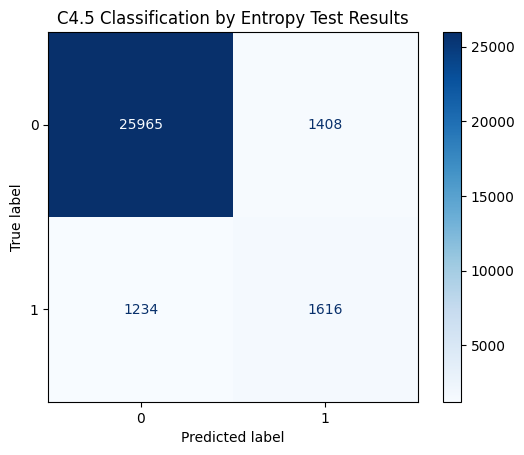

In [ ]:
# Make confusion matrix to visualize results
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and display it
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_model.classes_)
display_cm.plot(cmap=plt.cm.Blues)
plt.title('C4.5 Classification by Entropy Test Results')
plt.show()

In [ ]:
# Now, use the C4.5 model, but make the feature selection based on logistic regression

# Load data
print("Current state of DataFrame 'df' (after initial time conversions and `time_to_purchase_seconds` calculation, before dropping columns and one-hot encoding):")
display(df.head())

print("First few rows of preprocessed features (X):")
display(X.head())

print("First few rows of target variable (y):")
display(y.head())

Current state of DataFrame 'df' (after initial time conversions and `time_to_purchase_seconds` calculation, before dropping columns and one-hot encoding):


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_purchase_seconds
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,4361461.0


First few rows of preprocessed features (X):


,purchase_value,age,time_to_purchase_seconds,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,34,39,4506682.0,False,True,False,False,False,False,True
1,16,53,17944.0,False,False,False,False,False,False,False
2,15,53,1.0,False,True,False,False,True,False,True
3,44,41,492085.0,False,True,False,False,False,True,True
4,39,45,4361461.0,False,False,False,False,False,True,True


First few rows of target variable (y):


,class
0,0
1,0
2,1
3,0
4,0


In [ ]:
# Complete the standard 80/20 train/test split
from sklearn.model_selection import train_test_split

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train_fs: {X_train_fs.shape}")
print(f"Shape of X_test_fs: {X_test_fs.shape}")
print(f"Shape of y_train_fs: {y_train_fs.shape}")
print(f"Shape of y_test_fs: {y_test_fs.shape}")

Shape of X_train_fs: (120889, 10)
Shape of X_test_fs: (30223, 10)
Shape of y_train_fs: (120889,)
Shape of y_test_fs: (30223,)


In [ ]:
# Feature selection for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# 1. Instantiate and fit a Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train_fs, y_train_fs)

# 2. Instantiate SelectFromModel using the fitted Logistic Regression model
# The default threshold for SelectFromModel with LogisticRegression is usually 1e-5 or can be set based on coefficients.
# For simplicity, we'll use the mean of the absolute coefficients as a threshold for selection.
# You could also use a specific number of features to select, e.g., max_features=k
selector = SelectFromModel(log_reg, prefit=True, threshold='mean')

# 3. Transform X_train_fs and X_test_fs to create selected feature sets
# Convert DataFrames to NumPy arrays to avoid the UserWarning about feature names
X_train_selected = selector.transform(X_train_fs.to_numpy())
X_test_selected = selector.transform(X_test_fs.to_numpy())

# Get the names of the selected features (optional, but good for understanding)
selected_features_mask = selector.get_support()
selected_feature_names = X_train_fs.columns[selected_features_mask].tolist()

print("Logistic Regression model trained and used for feature selection.")
print(f"Original number of features: {X_train_fs.shape[1]}")
print(f"Selected features: {selected_feature_names}")
print(f"Number of features after selection: {X_train_selected.shape[1]}")
print(f"Shape of X_train_selected: {X_train_selected.shape}")
print(f"Shape of X_test_selected: {X_test_selected.shape}")

Logistic Regression model trained and used for feature selection.
Original number of features: 10
Selected features: ['time_to_purchase_seconds']
Number of features after selection: 1
Shape of X_train_selected: (120889, 1)
Shape of X_test_selected: (30223, 1)


In [ ]:
# Use C4.5 on the features chosen in the feature selection process, using entropy again
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier with criterion='entropy'
dt_model_fs = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on the feature-selected training data
dt_model_fs.fit(X_train_selected, y_train_fs)

print("Decision Tree Classifier (C4.5 equivalent) trained successfully on selected features.")

Decision Tree Classifier (C4.5 equivalent) trained successfully on selected features.


Model Accuracy with Feature Selection: 0.9191


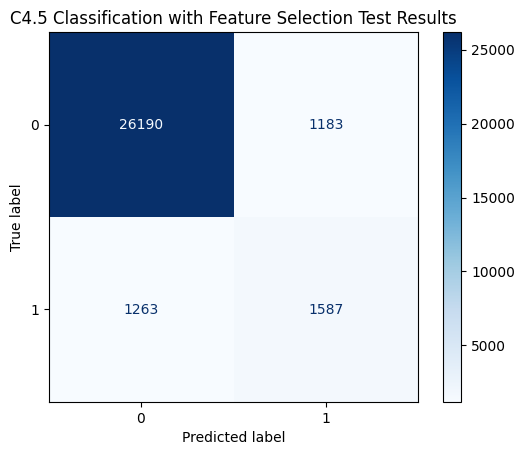

In [ ]:
# Make predictions and calculate accuracy on the C4.5 model with logistic regression for feature extraction
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Make predictions on the feature-selected test set
y_pred_fs = dt_model_fs.predict(X_test_selected)

# 2. Calculate and print the accuracy score
accuracy_fs = accuracy_score(y_test_fs, y_pred_fs)
print(f"Model Accuracy with Feature Selection: {accuracy_fs:.4f}")

# 3. Calculate the confusion matrix
cm_fs = confusion_matrix(y_test_fs, y_pred_fs)

# 4. Display the confusion matrix visually
display_cm_fs = ConfusionMatrixDisplay(confusion_matrix=cm_fs, display_labels=dt_model_fs.classes_)
display_cm_fs.plot(cmap=plt.cm.Blues)
plt.title('C4.5 Classification with Feature Selection Test Results')
plt.show()


In [ ]:
# Train a model using only logistic regression without C4.5
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instantiate the Logistic Regression model
# Using 'liblinear' solver for small datasets and L1/L2 regularization
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model on the full training data (not feature-selected)
log_reg_model.fit(X_train_fs, y_train_fs)

print("Logistic Regression model trained successfully.")

# Make predictions on the full test set (not feature-selected)
y_pred_lr = log_reg_model.predict(X_test_fs)

# Calculate the accuracy score
accuracy_lr = accuracy_score(y_test_fs, y_pred_lr)
print(f"Logistic Regression Model Accuracy: {accuracy_lr:.4f}")

# Calculate the confusion matrix
cm_lr = confusion_matrix(y_test_fs, y_pred_lr)

# Display the confusion matrix visually
display_cm_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=log_reg_model.classes_)
display_cm_lr.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Model Test Results')
plt.show()

In [ ]:
print("Trained Logistic Regression model (log_reg_model):")
display(log_reg_model)

Trained Logistic Regression model (log_reg_model):


LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# Repeat the logistic regression without C4.5 experiment with changing the threshold from 0.5, 0.05 to 0.5 in increments of 0.05
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate probabilities for the positive class (class 1)
probabilities = log_reg_model.predict_proba(X_test_fs)[:, 1]

# Define a range of decision boundaries
decision_boundaries = np.arange(0.05, 0.46, 0.05) # From 0.40 to 0.50, step 0.01

accuracies = []
confusion_matrices = {}

print("Evaluating Logistic Regression model with different decision boundaries:")
for threshold in decision_boundaries:
    # Convert probabilities to binary predictions based on the current threshold
    y_pred_threshold = (probabilities >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_fs, y_pred_threshold)
    accuracies.append((threshold, accuracy))

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_fs, y_pred_threshold)
    confusion_matrices[threshold] = cm

    print(f"\nThreshold: {threshold:.2f}, Accuracy: {accuracy:.4f}")
    # Display confusion matrix for each threshold
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Threshold: {threshold:.2f}')
    plt.show()

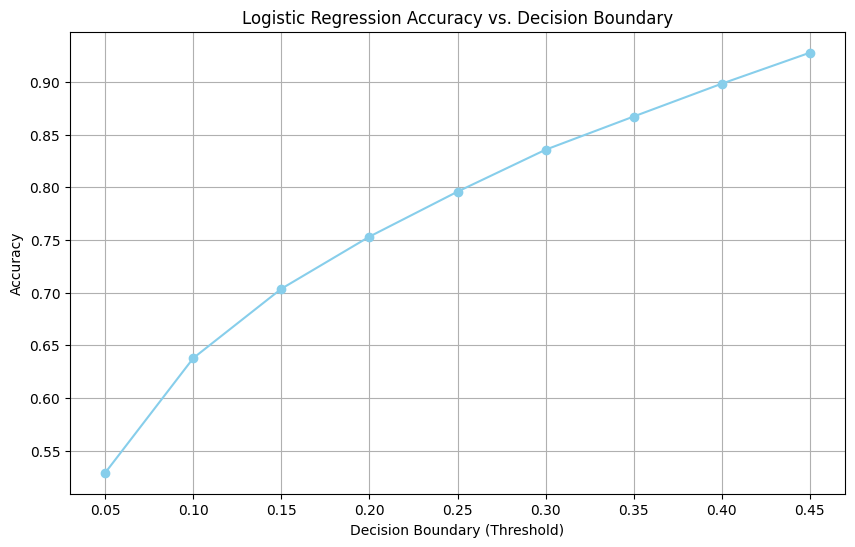

Accuracy vs. Decision Boundary plot generated.


In [ ]:
import matplotlib.pyplot as plt

# Extract thresholds and accuracies for plotting
threshold_values = [acc[0] for acc in accuracies]
accuracy_values = [acc[1] for acc in accuracies]

# Plot accuracy vs. decision boundary
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o', linestyle='-', color='skyblue')
plt.title('Logistic Regression Accuracy vs. Decision Boundary')
plt.xlabel('Decision Boundary (Threshold)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(threshold_values) # Ensure all thresholds are visible on the x-axis
plt.show()

print("Accuracy vs. Decision Boundary plot generated.")

Evaluating Logistic Regression model with finer decision boundaries (0.40-0.50):

Threshold: 0.40, Accuracy: 0.8984


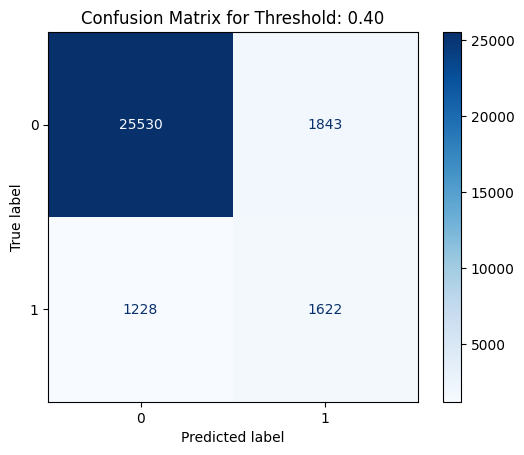


Threshold: 0.41, Accuracy: 0.9038


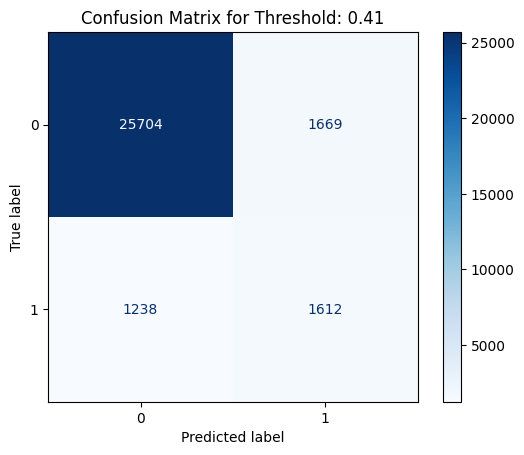


Threshold: 0.42, Accuracy: 0.9103


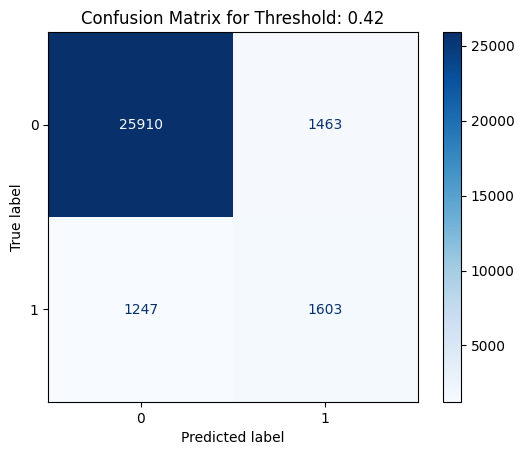


Threshold: 0.43, Accuracy: 0.9167


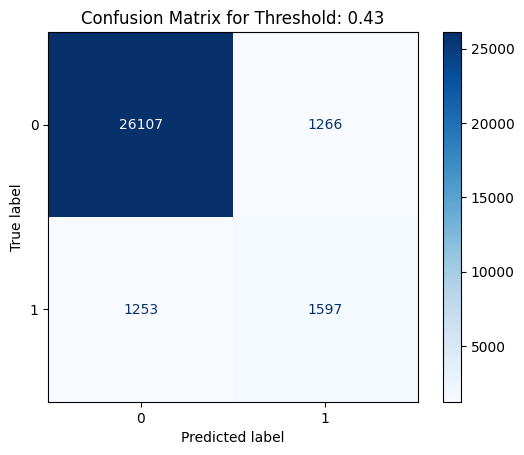


Threshold: 0.44, Accuracy: 0.9220


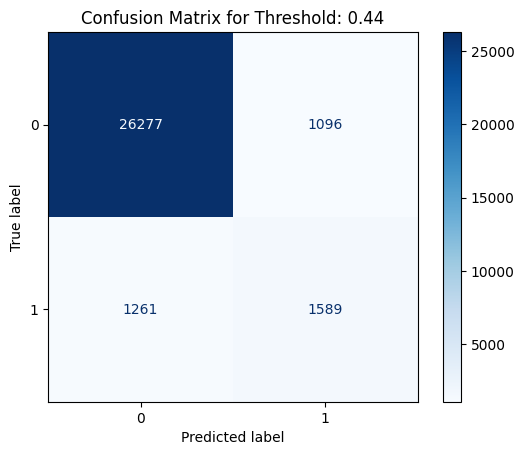


Threshold: 0.45, Accuracy: 0.9278


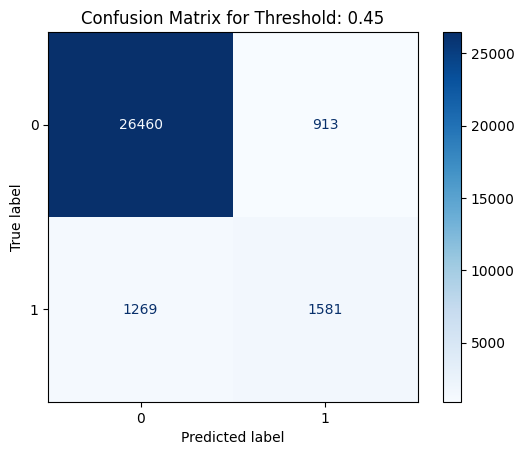


Threshold: 0.46, Accuracy: 0.9336


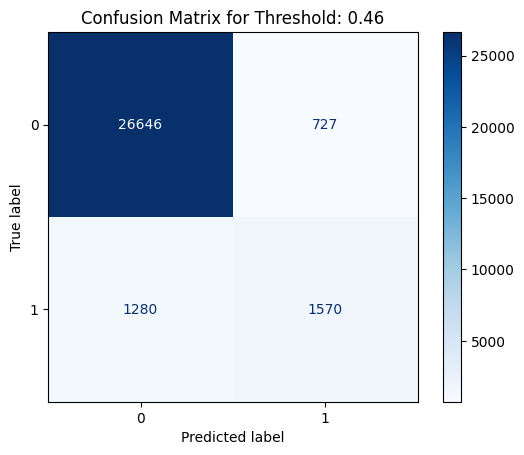


Threshold: 0.47, Accuracy: 0.9395


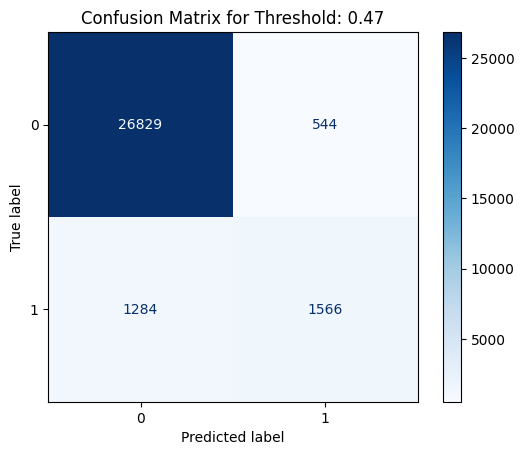


Threshold: 0.48, Accuracy: 0.9455


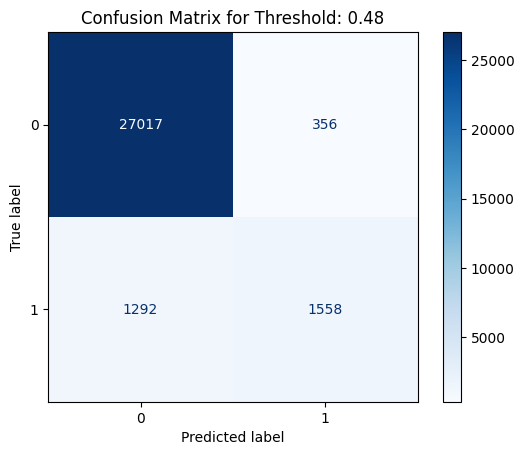


Threshold: 0.49, Accuracy: 0.9508


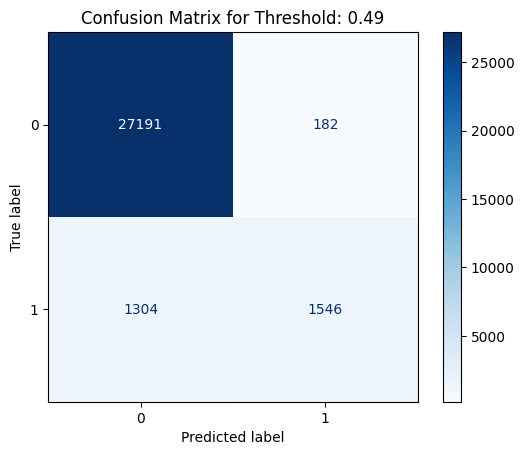


Threshold: 0.50, Accuracy: 0.9057


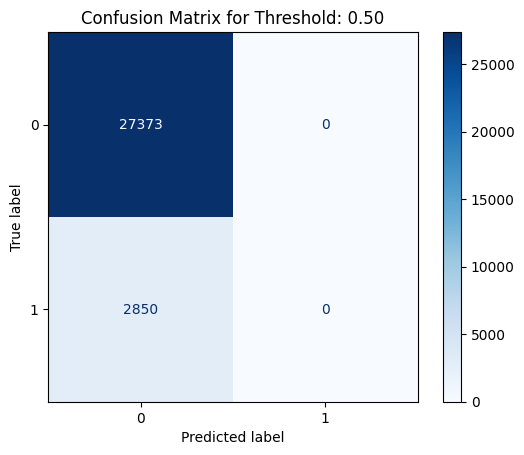

In [ ]:
# Now repeat the logistic regression without C4.5 experiment for thresholds ranging from 0.40 to 0.50, in 0.01 increments
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# The log_reg_model and probabilities are already computed from previous steps
# probabilities = log_reg_model.predict_proba(X_test_fs)[:, 1]

# Define a new, finer range of decision boundaries
decision_boundaries_finer = np.arange(0.40, 0.51, 0.01) # From 0.40 to 0.50, step 0.01

accuracies_finer = []
confusion_matrices_finer = {}

print("Evaluating Logistic Regression model with finer decision boundaries (0.40-0.50):")
for threshold in decision_boundaries_finer:
    # Convert probabilities to binary predictions based on the current threshold
    y_pred_threshold_finer = (probabilities >= threshold).astype(int)

    # Calculate accuracy
    accuracy_finer = accuracy_score(y_test_fs, y_pred_threshold_finer)
    accuracies_finer.append((threshold, accuracy_finer))

    # Calculate confusion matrix
    cm_finer = confusion_matrix(y_test_fs, y_pred_threshold_finer)
    confusion_matrices_finer[threshold] = cm_finer

    print(f"\nThreshold: {threshold:.2f}, Accuracy: {accuracy_finer:.4f}")
    # Display confusion matrix for each threshold
    disp_finer = ConfusionMatrixDisplay(confusion_matrix=cm_finer, display_labels=log_reg_model.classes_)
    disp_finer.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Threshold: {threshold:.2f}')
    plt.show()

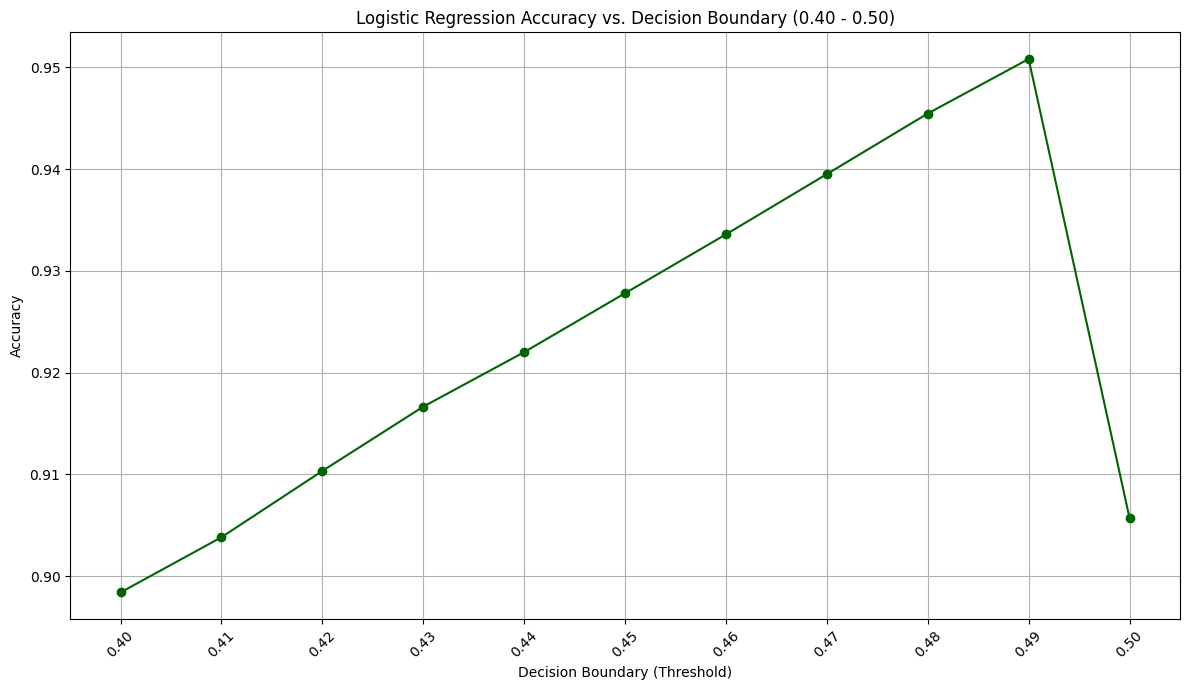

Accuracy vs. Decision Boundary plot for the finer range generated.


In [ ]:
# Make accuracy plot
import matplotlib.pyplot as plt

# Extract thresholds and accuracies for plotting from the finer evaluation
threshold_values_finer = [acc[0] for acc in accuracies_finer]
accuracy_values_finer = [acc[1] for acc in accuracies_finer]

# Plot accuracy vs. decision boundary for the finer range
plt.figure(figsize=(12, 7))
plt.plot(threshold_values_finer, accuracy_values_finer, marker='o', linestyle='-', color='darkgreen')
plt.title('Logistic Regression Accuracy vs. Decision Boundary (0.40 - 0.50)')
plt.xlabel('Decision Boundary (Threshold)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(threshold_values_finer, rotation=45) # Ensure all thresholds are visible on the x-axis
plt.tight_layout()
plt.show()

print("Accuracy vs. Decision Boundary plot for the finer range generated.")

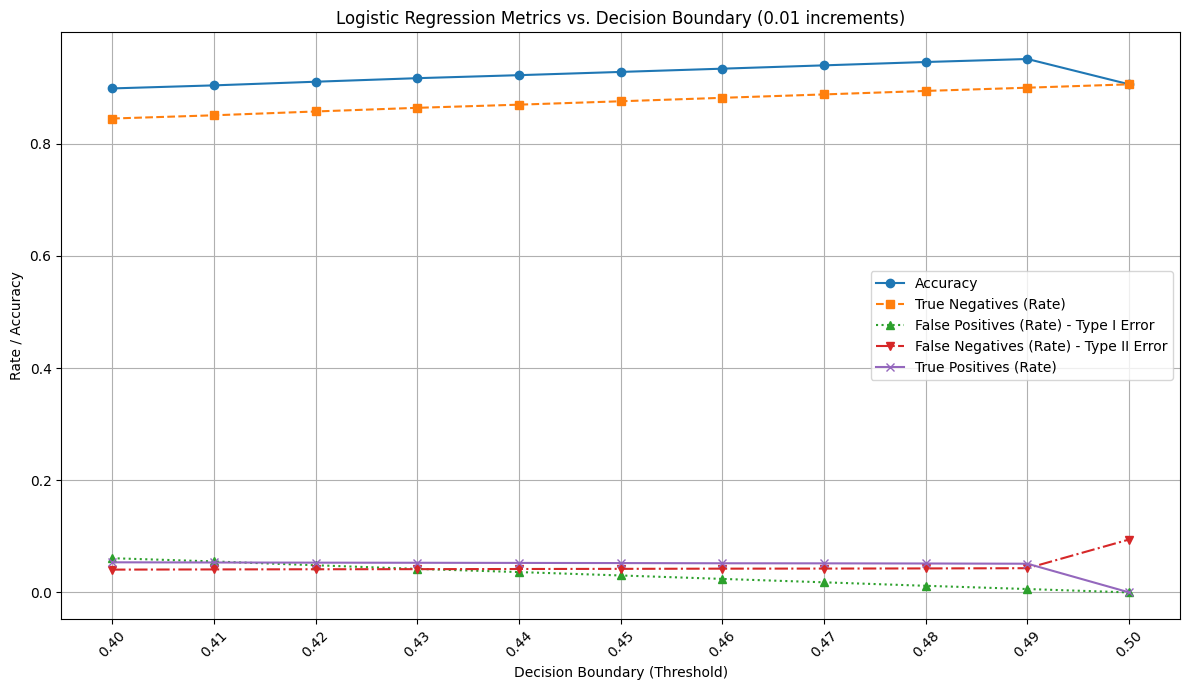

Metrics plot for 0.01 increments generated.


In [ ]:
# Plot the other data in the confusion matrices
import matplotlib.pyplot as plt
import pandas as pd

# Assuming accuracies_finer and confusion_matrices_finer from the second experiment are available
# Total number of samples in the test set
total_samples = len(y_test_fs)

metrics_data_finer = []

for threshold, accuracy_finer in accuracies_finer:
    cm_finer = confusion_matrices_finer[threshold]
    tn, fp, fn, tp = cm_finer.ravel() # Flatten the confusion matrix to get TN, FP, FN, TP

    # Normalize metrics by total samples to plot them on the same scale (0-1) as accuracy
    metrics_data_finer.append({
        'Threshold': threshold,
        'Accuracy': accuracy_finer,
        'True Negatives (Rate)': tn / total_samples,
        'False Positives (Rate)': fp / total_samples, # Type I Error
        'False Negatives (Rate)': fn / total_samples, # Type II Error
        'True Positives (Rate)': tp / total_samples
    })

metrics_df_finer = pd.DataFrame(metrics_data_finer)

# Plotting the metrics for finer increments
plt.figure(figsize=(12, 7))
plt.plot(metrics_df_finer['Threshold'], metrics_df_finer['Accuracy'], marker='o', linestyle='-', label='Accuracy')
plt.plot(metrics_df_finer['Threshold'], metrics_df_finer['True Negatives (Rate)'], marker='s', linestyle='--', label='True Negatives (Rate)')
plt.plot(metrics_df_finer['Threshold'], metrics_df_finer['False Positives (Rate)'], marker='^', linestyle=':', label='False Positives (Rate) - Type I Error')
plt.plot(metrics_df_finer['Threshold'], metrics_df_finer['False Negatives (Rate)'], marker='v', linestyle='-.', label='False Negatives (Rate) - Type II Error')
plt.plot(metrics_df_finer['Threshold'], metrics_df_finer['True Positives (Rate)'], marker='x', linestyle='-', label='True Positives (Rate)')

plt.title('Logistic Regression Metrics vs. Decision Boundary (0.01 increments)')
plt.xlabel('Decision Boundary (Threshold)')
plt.ylabel('Rate / Accuracy')
plt.grid(True)
plt.xticks(metrics_df_finer['Threshold'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

print("Metrics plot for 0.01 increments generated.")

Evaluating Logistic Regression model with extended 0.05 increments (0.05-0.50):

Threshold: 0.05, Accuracy: 0.5289


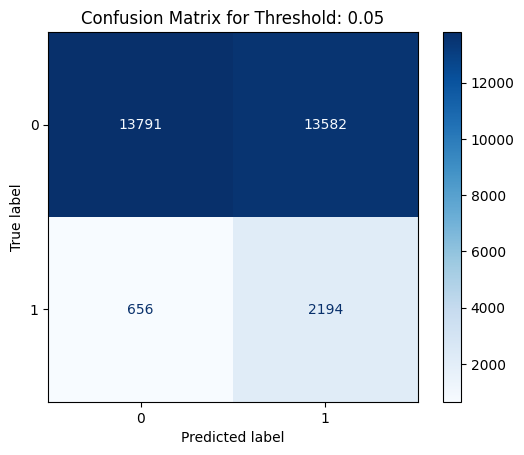


Threshold: 0.10, Accuracy: 0.6378


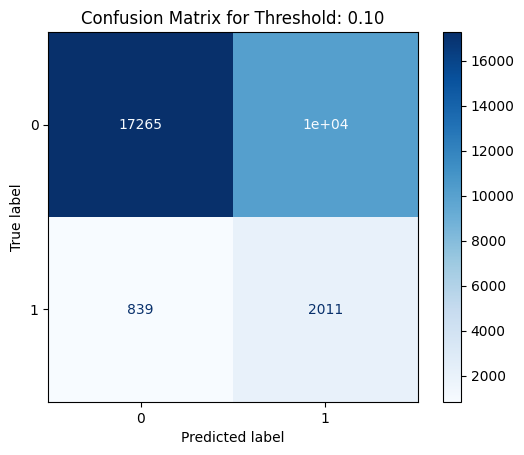


Threshold: 0.15, Accuracy: 0.7036


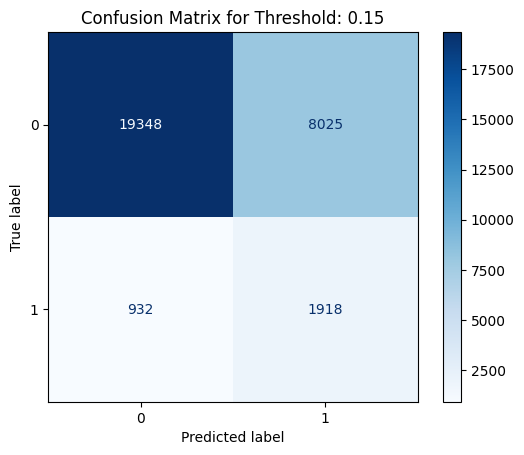


Threshold: 0.20, Accuracy: 0.7531


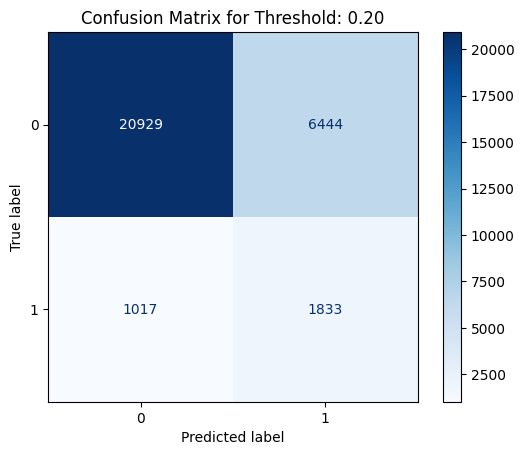


Threshold: 0.25, Accuracy: 0.7959


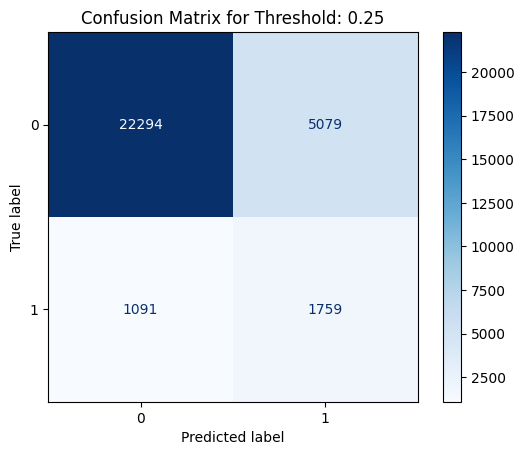


Threshold: 0.30, Accuracy: 0.8357


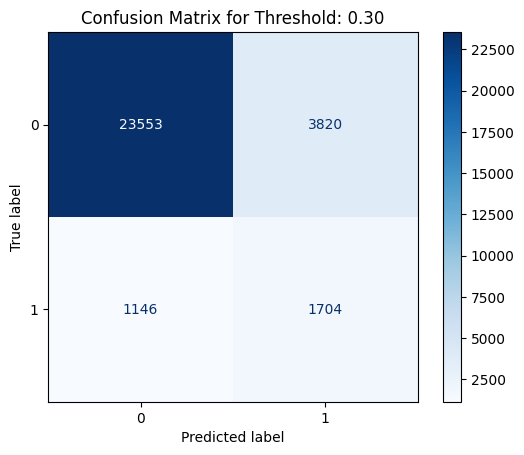


Threshold: 0.35, Accuracy: 0.8672


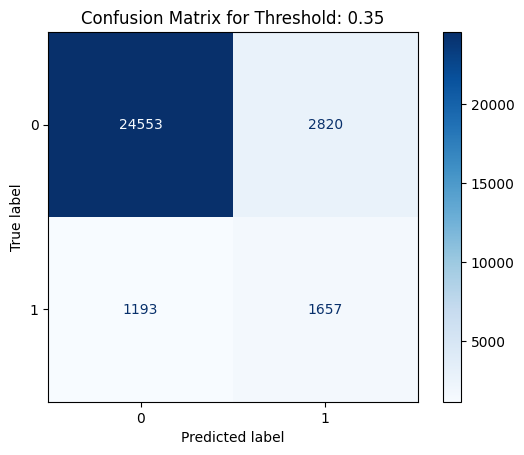


Threshold: 0.40, Accuracy: 0.8984


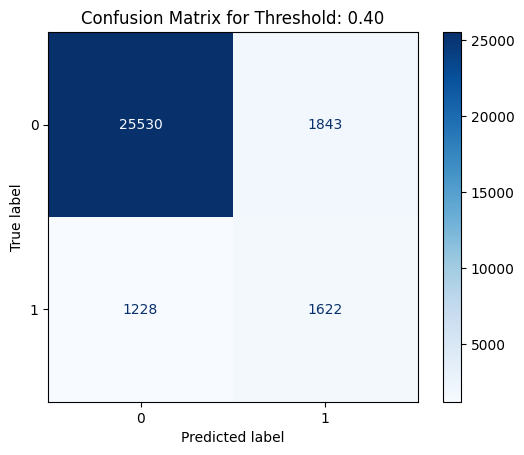


Threshold: 0.45, Accuracy: 0.9278


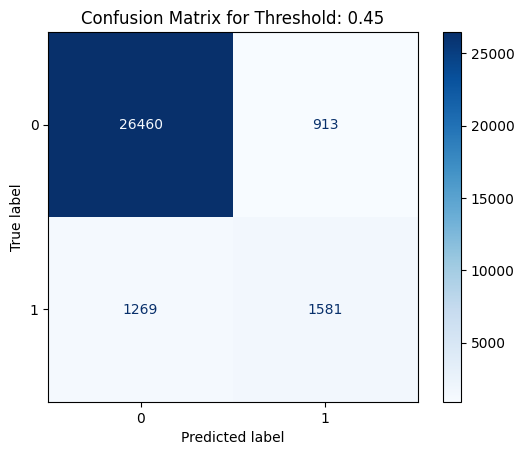


Threshold: 0.50, Accuracy: 0.9057


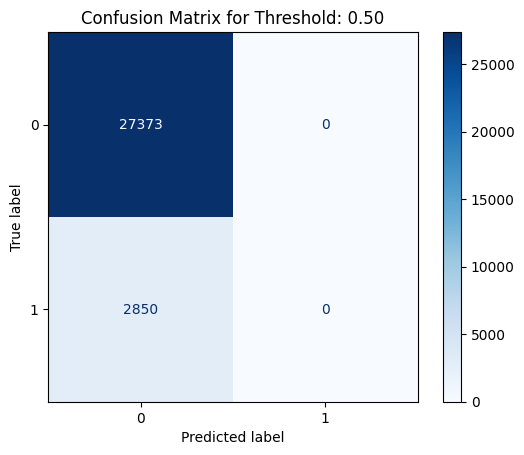

In [ ]:
# Repeat other experiment in order to make the same plot
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# The log_reg_model and probabilities are already computed from previous steps
# probabilities = log_reg_model.predict_proba(X_test_fs)[:, 1]

# Define the new range of decision boundaries: 0.05 to 0.50, step 0.05
decision_boundaries_005_extended = np.arange(0.05, 0.51, 0.05)

accuracies_005_extended = []
confusion_matrices_005_extended = {}

print("Evaluating Logistic Regression model with extended 0.05 increments (0.05-0.50):")
for threshold in decision_boundaries_005_extended:
    # Convert probabilities to binary predictions based on the current threshold
    y_pred_threshold_005_extended = (probabilities >= threshold).astype(int)

    # Calculate accuracy
    accuracy_005_extended = accuracy_score(y_test_fs, y_pred_threshold_005_extended)
    accuracies_005_extended.append((threshold, accuracy_005_extended))

    # Calculate confusion matrix
    cm_005_extended = confusion_matrix(y_test_fs, y_pred_threshold_005_extended)
    confusion_matrices_005_extended[threshold] = cm_005_extended

    print(f"\nThreshold: {threshold:.2f}, Accuracy: {accuracy_005_extended:.4f}")
    # Display confusion matrix for each threshold
    disp_005_extended = ConfusionMatrixDisplay(confusion_matrix=cm_005_extended, display_labels=log_reg_model.classes_)
    disp_005_extended.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Threshold: {threshold:.2f}')
    plt.show()

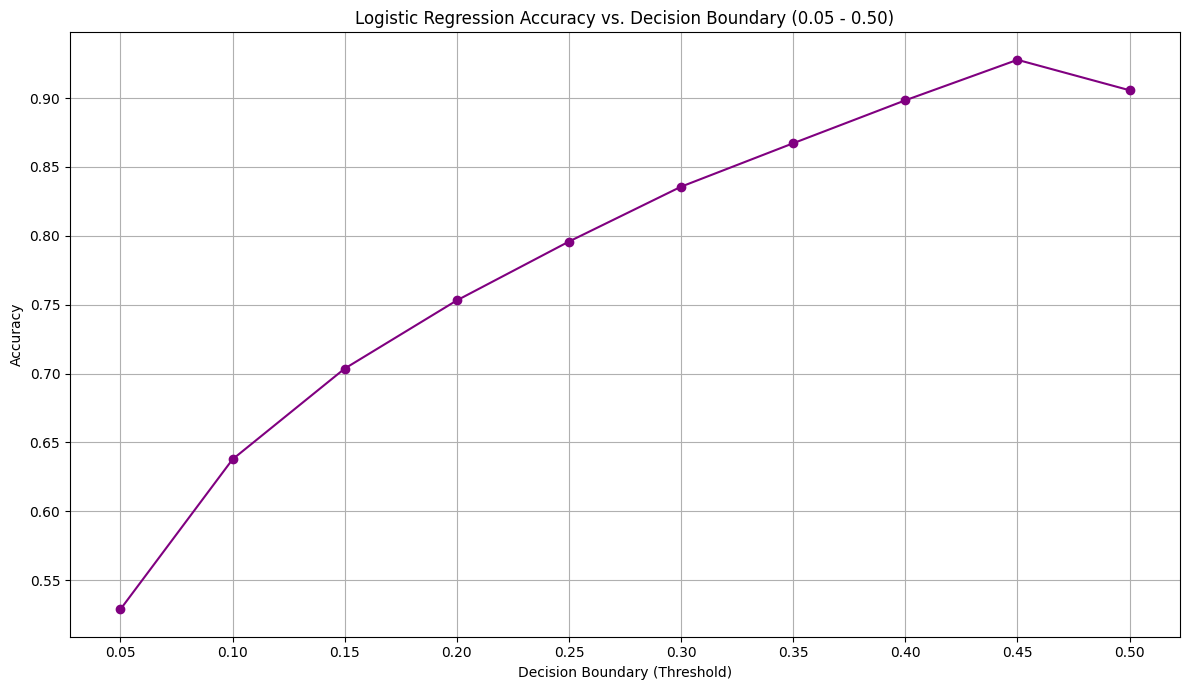

Accuracy vs. Decision Boundary plot for the extended 0.05 range generated.


In [ ]:
# Make the accuracy plot
import matplotlib.pyplot as plt

# Extract thresholds and accuracies for plotting from the extended 0.05 evaluation
threshold_values_005_extended = [acc[0] for acc in accuracies_005_extended]
accuracy_values_005_extended = [acc[1] for acc in accuracies_005_extended]

# Plot accuracy vs. decision boundary for the extended 0.05 range
plt.figure(figsize=(12, 7))
plt.plot(threshold_values_005_extended, accuracy_values_005_extended, marker='o', linestyle='-', color='purple')
plt.title('Logistic Regression Accuracy vs. Decision Boundary (0.05 - 0.50)')
plt.xlabel('Decision Boundary (Threshold)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(threshold_values_005_extended) # Ensure all thresholds are visible on the x-axis
plt.tight_layout()
plt.show()

print("Accuracy vs. Decision Boundary plot for the extended 0.05 range generated.")

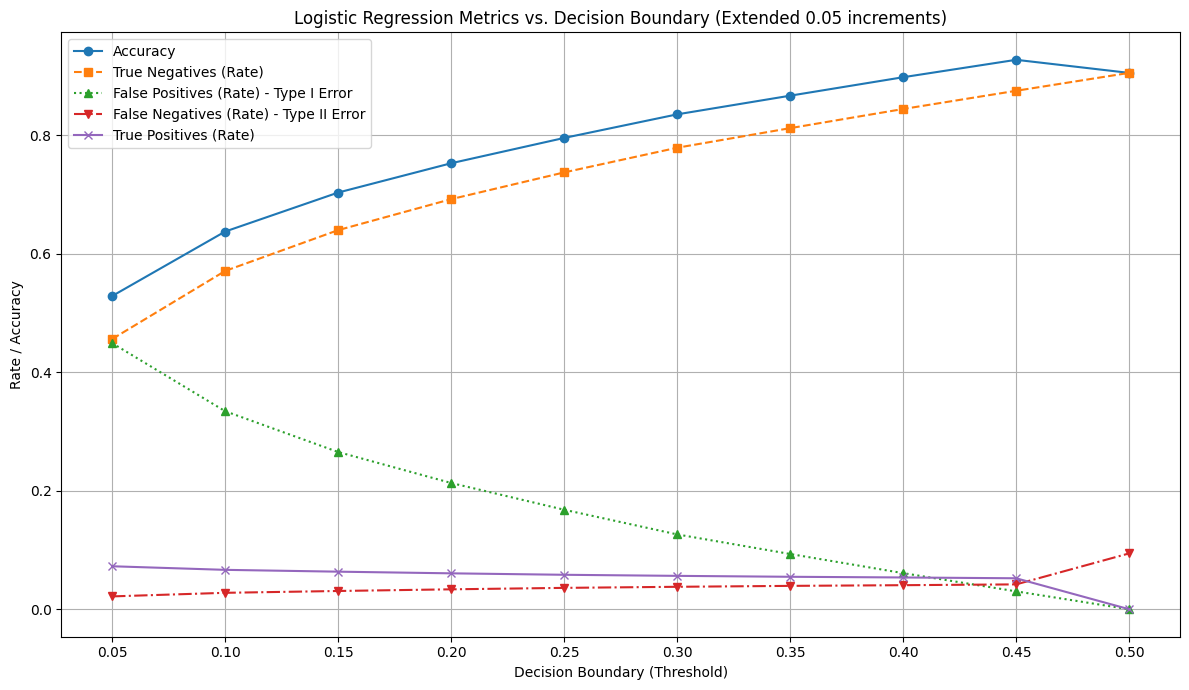

Metrics plot for extended 0.05 increments generated.


In [ ]:
# Plot confusion matrix data for the other model
import matplotlib.pyplot as plt
import pandas as pd

# Total number of samples in the test set
total_samples = len(y_test_fs)

metrics_data_005_extended = []

for threshold, accuracy_val in accuracies_005_extended:
    cm_val = confusion_matrices_005_extended[threshold]
    tn, fp, fn, tp = cm_val.ravel() # Flatten the confusion matrix to get TN, FP, FN, TP

    # Normalize metrics by total samples to plot them on the same scale (0-1) as accuracy
    metrics_data_005_extended.append({
        'Threshold': threshold,
        'Accuracy': accuracy_val,
        'True Negatives (Rate)': tn / total_samples,
        'False Positives (Rate)': fp / total_samples, # Type I Error
        'False Negatives (Rate)': fn / total_samples, # Type II Error
        'True Positives (Rate)': tp / total_samples
    })

metrics_df_005_extended = pd.DataFrame(metrics_data_005_extended)

# Plotting the metrics for extended 0.05 increments
plt.figure(figsize=(12, 7))
plt.plot(metrics_df_005_extended['Threshold'], metrics_df_005_extended['Accuracy'], marker='o', linestyle='-', label='Accuracy')
plt.plot(metrics_df_005_extended['Threshold'], metrics_df_005_extended['True Negatives (Rate)'], marker='s', linestyle='--', label='True Negatives (Rate)')
plt.plot(metrics_df_005_extended['Threshold'], metrics_df_005_extended['False Positives (Rate)'], marker='^', linestyle=':', label='False Positives (Rate) - Type I Error')
plt.plot(metrics_df_005_extended['Threshold'], metrics_df_005_extended['False Negatives (Rate)'], marker='v', linestyle='-.', label='False Negatives (Rate) - Type II Error')
plt.plot(metrics_df_005_extended['Threshold'], metrics_df_005_extended['True Positives (Rate)'], marker='x', linestyle='-', label='True Positives (Rate)')

plt.title('Logistic Regression Metrics vs. Decision Boundary (Extended 0.05 increments)')
plt.xlabel('Decision Boundary (Threshold)')
plt.ylabel('Rate / Accuracy')
plt.grid(True)
plt.xticks(metrics_df_005_extended['Threshold'])
plt.legend()
plt.tight_layout()
plt.show()

print("Metrics plot for extended 0.05 increments generated.")